# Welcome to MNIST with keras

In [12]:
!pip install -q -U keras

import keras

print('keras : version {}'.format(keras.__version__))


keras : version 2.2.0


### Step 1: Download the dataset

The MNIST dataset contains thousands of grayscale images of handwritten digits.

In [13]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

## Step 1a: Have a look at your data
Let's have a look at the training data:

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

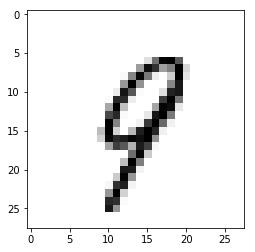

In [16]:
import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)

plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

### Step 2) Prepare your data
Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Next, we want to convert the labels from an integer format (e.g., "2"), to a [one hot encoding](https://en.wikipedia.org/wiki/One-hot) (e.g., "0, 0, 1, 0, 0, 0, 0, 0, 0, 0"). To do so, we'll use the `keras.utils.to_categorical` [function](https://keras.io/utils/).

In [7]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

### Step 3) Build the model

Now, we'll create our neural network using the [Keras Sequential API](https://keras.io/models/sequential/). 
* Architecture wise, we'll single layer network. 
* The hidden layer will have 512 units using the [ReLU](https://keras.io/activations#relu) activation function. 
* The output layer will have 10 units and use [softmax](https://keras.io/activations#softmax) function. 
* Notice, we specify the input shape on the first layer. If you add subsequent layers, this is not necessary. 
* We will use the [categorical crossentropy](https://keras.io/losses#categorical_crossentropy) loss function, and the [RMSProp](https://keras.io/optimizers#rmsprop) optimizer.

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(keras.layers.Dense(10, activation='softmax'))

# We will now compile and print out a summary of our model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Step 4) Training

Next, we will train the model by using the [fit method](https://keras.io/models/model#fit) for 5 [epochs](https://www.quora.com/What-is-epochs-in-machine-learning). We will keep track of the training loss and accuracy as we go. This step may take a while depending on your hardware.

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.2576 - acc: 0.9253
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1045 - acc: 0.9684
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0689 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.0507 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0377 - acc: 0.9886


### Step 5) Testing
Now that we have trained our model, we want to evaluate it. Sure, our model is >97% accurate on the training set, but what about on data it hasn't seen before? The test accuracy is a good metric for that.

In [10]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % (accuracy))

10000/10000 [==============================] - 0s 31us/step
Test accuracy: 0.98


## Congratulations
You have successfully used Keras to train a model on the MNIST dataset.